## 1. Load the data and basic data exploration
Lets load the data and check them out 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import library.utils 

In [3]:
users = pd.read_csv('../data/users.csv')
orders = pd.read_csv('../data/orders.csv')
feedback = pd.read_csv('../data/feedback.csv')
items_info = pd.read_csv('../data/itemsInfo.csv' ,low_memory=False)    #set the low_memory to false to avoid error for ambiguuos data types
restaurants = pd.read_csv('../data/restaurants.csv')

In [4]:
# Check the shape of the data types
print('Users:',users.shape)
print('Orders:',orders.shape)
print('Feedback:',feedback.shape)
print('Items:', items_info.shape)
print('restaurants:', restaurants.shape)

Users: (5268, 23)
Orders: (14883, 27)
Feedback: (802, 7)
Items: (83352, 15)
restaurants: (901, 23)


### 1.1. User Data Exploration

First lets look into users data, how many unique users are signed up? are there any null values in the data?

In [5]:
# check the rows and columns
users.head()

,AccessFailedCount,EmailConfirmed,Id,LockoutEnabled,LockoutEnd,PhoneNumberConfirmed,TwoFactorEnabled,UserName,NormalizedUserName,Email,...,ConcurrencyStamp,PhoneNumber,IsEnabled,IsCompleted,CreatedDate,FirstName,LastName,PhotoUrl,RecommendedTags,PaymentCustomerId
0,0,True,43,True,NaN,False,False,abdolrezab.ayesteh@gmail.com,ABDOLREZAB.AYESTEH@GMAIL.COM,abdolrezab.ayesteh@gmail.com,...,9b25b262-4e49-43f5-b067-889b156c2f00,NaN,True,True,2018-12-20T23:32:45.168237Z,Abdolreza,Bayesteh,NaN,NaN,NaN
1,0,False,6,True,NaN,False,False,a.bdolreza.bayesteh@gmail.com,A.BDOLREZA.BAYESTEH@GMAIL.COM,a.bdolreza.bayesteh@gmail.com,...,29953587-a4e1-498f-acaa-e8ff913949b4,NaN,True,True,2018-12-14T08:00:16.447474Z,Reza,Bayesteh,NaN,NaN,NaN
2,0,False,46,True,NaN,False,False,wayne.zhang@globalrelay.net,WAYNE.ZHANG@GLOBALRELAY.NET,wayne.zhang@globalrelay.net,...,fa87b301-5b54-49a3-b7c1-2cf676867da3,NaN,True,True,2019-01-14T19:35:54.968657Z,Wayne,Zhang,NaN,NaN,NaN
3,0,True,7,True,NaN,False,False,ab.dolreza.bayesteh@gmail.com,AB.DOLREZA.BAYESTEH@GMAIL.COM,ab.dolreza.bayesteh@gmail.com,...,46e5c130-01cd-4098-b0de-7689ebccff71,NaN,True,True,2018-12-14T17:28:54.565647Z,Reza,Bayesteh,https://res.cloudinary.com/dng7glos4/image/upl...,NaN,NaN
4,0,False,47,True,NaN,False,False,waynezhangyuwei@Gmail.com,WAYNEZHANGYUWEI@GMAIL.COM,waynezhangyuwei@Gmail.com,...,a670b7da-07d3-47e7-9272-116fcf143e76,NaN,True,True,2019-01-14T19:36:41.291717Z,Wayne,Zhang,NaN,NaN,NaN


In [6]:
# general information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AccessFailedCount     5268 non-null   int64 
 1   EmailConfirmed        5268 non-null   bool  
 2   Id                    5268 non-null   int64 
 3   LockoutEnabled        5268 non-null   bool  
 4   LockoutEnd            9 non-null      object
 5   PhoneNumberConfirmed  5268 non-null   bool  
 6   TwoFactorEnabled      5268 non-null   bool  
 7   UserName              5268 non-null   object
 8   NormalizedUserName    5268 non-null   object
 9   Email                 5268 non-null   object
 10  NormalizedEmail       5268 non-null   object
 11  PasswordHash          549 non-null    object
 12  SecurityStamp         5268 non-null   object
 13  ConcurrencyStamp      5268 non-null   object
 14  PhoneNumber           3293 non-null   object
 15  IsEnabled             5268 non-null   

Due to having some information like email and phone number for the users, we wont be able to keep the user data publicly and we will just use the userId.

In [7]:
users_df = users[['Id']]

In [8]:
# check for user id duplicattion 
users_df.duplicated().any()

False

In [9]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      5268 non-null   int64
dtypes: int64(1)
memory usage: 41.3 KB


In [10]:
# save the users file to keep it
file_path = '../data'
#library.utils.save_file(users_df,'users_df.csv',file_path)

### 1.2. Orders Data Exploration

In [11]:
orders.head()

,Id,UserId,RestaurantId,Created,PaymentId,CheckoutId,Status,Details,AcceptedDate,CompletedDate,...,Nickname,PhoneNumber,PreorderDate,RestaurantOrderId,HasFeedback,PlatformFee,PaymentType,PaymentFailedDate,PaymentFailureMessage,RejectedDate
0,8,113.0,110,2020-03-28T08:15:25.615002Z,pi_1GRZqUAAWyjnNOlkiFjgpPyE,b165e2b9-ceb0-43a4-b5f5-15b15cbb018c,6,"{""Id"": 8, ""Tax"": 5.0400, ""Tip"": 0, ""User"": {""I...",2020-04-15T06:01:25.273238Z,2020-04-15T15:54:00.38724Z,...,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN
1,45,113.0,110,2020-04-15T21:32:36.397056Z,pi_1GYIqbAAWyjnNOlkaCZ35F1f,9e1952e5-0432-4815-8f3a-b6660dd5fc0f,6,"{""Tax"": 4.8000, ""Tip"": 0, ""Items"": [{""Count"": ...",2020-04-15T21:34:13.23458Z,2020-04-15T21:35:27.029812Z,...,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN
2,5,1.0,110,2020-03-26T05:40:08.022949Z,pi_1GRTn9AAWyjnNOlkIa4IwZIr,38f4af09-7cf2-4297-8108-133d129a64c7,6,"{""Id"": 5, ""Tax"": 38.5200, ""Tip"": 0, ""Items"": [...",2020-04-06T07:50:46.779871Z,2020-04-08T18:04:11.39916Z,...,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN
3,2,4.0,110,2020-03-20T19:31:44.139248Z,pi_1GPJaxAAWyjnNOlkt4L7WfYh,d78a7d5d-e5d6-4a3c-8efd-6e32a9722807,6,"{""Id"": 2, ""Tax"": 4.08, ""Tip"": 0, ""Items"": [{""C...",2020-04-06T07:50:49.604742Z,2020-04-08T18:04:04.017236Z,...,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN
4,4,115.0,110,2020-03-22T06:52:54.185165Z,pi_1GPNhgAAWyjnNOlkT7fki2dX,e7b23017-dec2-43a4-ab14-6e266b910c89,6,"{""Id"": 4, ""Tax"": 5.04, ""Tip"": 0, ""Items"": [{""C...",2020-04-06T07:50:47.742422Z,2020-04-08T18:04:07.880017Z,...,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14883 entries, 0 to 14882
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     14883 non-null  int64  
 1   UserId                 6903 non-null   float64
 2   RestaurantId           14883 non-null  int64  
 3   Created                14883 non-null  object 
 4   PaymentId              10718 non-null  object 
 5   CheckoutId             14883 non-null  object 
 6   Status                 14883 non-null  int64  
 7   Details                11629 non-null  object 
 8   AcceptedDate           5983 non-null   object 
 9   CompletedDate          11440 non-null  object 
 10  PaymentDate            11544 non-null  object 
 11  ProcessedDate          11485 non-null  object 
 12  SubmittedDate          11629 non-null  object 
 13  OrderType              14883 non-null  int64  
 14  CanceledDate           118 non-null    object 
 15  Pr

#### There are 14883 orders by 6900 users. There are some orders that are made with guest account and they dont have user Ids. Let check how many orders have been made by unique users.

In [13]:
#orders[orders.UserId.duplicated()].sort_values('UserId', ascending = True)
orders.UserId.nunique()

4282

In [14]:
orders.columns

Index(['Id', 'UserId', 'RestaurantId', 'Created', 'PaymentId', 'CheckoutId',
       'Status', 'Details', 'AcceptedDate', 'CompletedDate', 'PaymentDate',
       'ProcessedDate', 'SubmittedDate', 'OrderType', 'CanceledDate',
       'ProcessingTime', 'EmailAddress', 'Nickname', 'PhoneNumber',
       'PreorderDate', 'RestaurantOrderId', 'HasFeedback', 'PlatformFee',
       'PaymentType', 'PaymentFailedDate', 'PaymentFailureMessage',
       'RejectedDate'],
      dtype='object')

We dont need all the details from order object. Lets filter the features we need to keep.

In [15]:
orders.drop(['PaymentId', 'CheckoutId',
       'Status', 'AcceptedDate', 'CompletedDate', 'PaymentDate',
       'ProcessedDate', 'SubmittedDate', 'OrderType', 'CanceledDate',
       'ProcessingTime', 'EmailAddress', 'Nickname', 'PhoneNumber',
       'PreorderDate', 'RestaurantOrderId', 'HasFeedback', 'PlatformFee',
       'PaymentType', 'PaymentFailedDate', 'PaymentFailureMessage',
       'RejectedDate'] , inplace = True, axis= 1)

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14883 entries, 0 to 14882
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14883 non-null  int64  
 1   UserId        6903 non-null   float64
 2   RestaurantId  14883 non-null  int64  
 3   Created       14883 non-null  object 
 4   Details       11629 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 581.5+ KB


In [17]:
print('unique orders:',orders.Id.nunique())

unique orders: 14883


In [18]:
orders.Details.head()

0    {"Id": 8, "Tax": 5.0400, "Tip": 0, "User": {"I...
1    {"Tax": 4.8000, "Tip": 0, "Items": [{"Count": ...
2    {"Id": 5, "Tax": 38.5200, "Tip": 0, "Items": [...
3    {"Id": 2, "Tax": 4.08, "Tip": 0, "Items": [{"C...
4    {"Id": 4, "Tax": 5.04, "Tip": 0, "Items": [{"C...
Name: Details, dtype: object

As seen above, Details feature has all the information for the ordered food. Therefor if there is an order without details we really dont need that. Lets drop the orders that do not have details.

In [19]:
print('The number of orders without details:',orders.Details.isnull().sum())
orders[orders.Details.isnull()]

The number of orders without details: 3254


,Id,UserId,RestaurantId,Created,Details
7,497,NaN,121,2020-07-22T00:42:13.134842Z,NaN
8,545,NaN,1029,2020-07-23T01:00:26.610172Z,NaN
9,546,NaN,1029,2020-07-23T01:00:55.73311Z,NaN
11,270,1.0,110,2020-05-10T07:02:20.748807Z,NaN
14,242,135.0,110,2020-05-06T00:02:48.443678Z,NaN
...,...,...,...,...,...
14841,14751,NaN,299,2022-01-13T01:04:20.19769Z,NaN
14849,14760,NaN,299,2022-01-13T22:13:02.1426Z,NaN
14850,14761,NaN,121,2022-01-13T22:26:59.240739Z,NaN
14864,14795,NaN,299,2022-01-19T00:44:40.245651Z,NaN


In [20]:
orders.dropna(subset = ['Details'], inplace = True)

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11629 entries, 0 to 14882
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            11629 non-null  int64  
 1   UserId        6721 non-null   float64
 2   RestaurantId  11629 non-null  int64  
 3   Created       11629 non-null  object 
 4   Details       11629 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 545.1+ KB


In [22]:
orders.nunique()

Id              11629
UserId           4222
RestaurantId        7
Created         11629
Details         11307
dtype: int64

Lets take the Items out from the Details object

In [23]:
orders.Details.iloc[200]

'{"tax": 4.3200, "tip": 0, "items": [{"count": 1, "price": 27.00, "total": 27.00, "options": [{"id": 45, "name": "Large", "price": 6.00}, {"id": 47, "name": "Chicken", "price": 3.00}], "menuItem": {"id": 188, "name": "Mussels", "price": 18.00}}, {"count": 1, "price": 9.00, "total": 9.00, "menuItem": {"id": 196, "name": "Greens", "price": 9.00}}], "total": 40.3200, "payment": {"id": "pm_1GfIWgAAWyjnNOlk1eHTpDPJ", "brand": "visa", "last4": "4242", "expYear": 2023, "expMonth": 12}, "currency": "cad", "subtotal": 36.00, "deliveryFee": 0, "taxPercentage": 12.00}'

As seen above all the information for ordered foods are combined in a dictionary format object, we need to extract the Items from the object and add it to another column. Also we will the address too, for geographical analysis.

In [24]:
orders.Details = orders.Details.apply(lambda x : json.loads(x))
orders['Address']= orders.Details.apply(lambda x : library.utils.return_value('address',x))
orders['Items']= orders.Details.apply(lambda x : library.utils.return_value('items',x))

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11629 entries, 0 to 14882
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            11629 non-null  int64  
 1   UserId        6721 non-null   float64
 2   RestaurantId  11629 non-null  int64  
 3   Created       11629 non-null  object 
 4   Details       11629 non-null  object 
 5   Address       350 non-null    object 
 6   Items         11629 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 726.8+ KB


Rename the Created to Date and change the type to date time

In [26]:
orders.rename(columns = {'Created' : 'Date'} , inplace=True)
orders.columns

Index(['Id', 'UserId', 'RestaurantId', 'Date', 'Details', 'Address', 'Items'], dtype='object')

In [27]:
orders.Date = orders.Date.astype('datetime64')

In [28]:
orders.dtypes

Id                       int64
UserId                 float64
RestaurantId             int64
Date            datetime64[ns]
Details                 object
Address                 object
Items                   object
dtype: object

Lets see which day of the week had the highest order number

In [29]:
weekday_count = orders.Date.dt.day_name().value_counts()

Text(0, 0.5, 'Order Numbers')

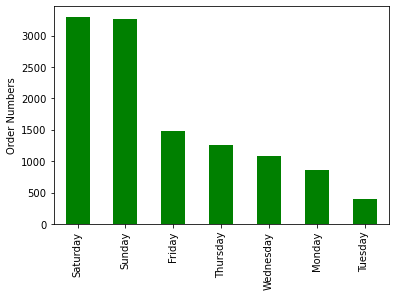

In [30]:
weekday_count.plot(kind = 'bar', color='green')
plt.ylabel('Order Numbers')

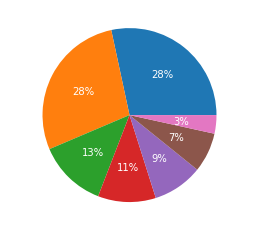

In [31]:
plt.pie(weekday_count, labels = weekday_count.index,textprops=dict(color="w") ,autopct='%1.0f%%');
plt.show()

In [32]:
month_count = orders.Date.dt.month_name().value_counts()

Text(0, 0.5, 'Order Numbers')

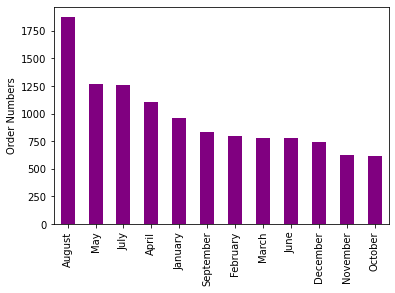

In [33]:
month_count.plot(kind = 'bar', color='purple')
plt.ylabel('Order Numbers')

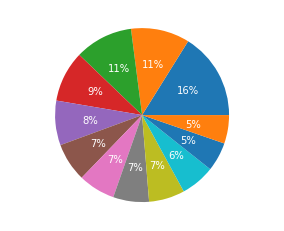

In [34]:
plt.pie(month_count, labels = month_count.index,textprops=dict(color="w") ,autopct='%1.0f%%');
plt.show()

Lets join users and orders to get the orders that have userId. There are some orders have been submitted with guest users, that unfortunately we dont have any association.

In [35]:
users_order = pd.merge(orders, users_df,left_on = 'UserId', right_on = 'Id', how='inner')

In [36]:
print(users_order.shape[0],'orders have a userId')

6721 orders have a userId


In [37]:
users_order.head()

,Id_x,UserId,RestaurantId,Date,Details,Address,Items,Id_y
0,8,113.0,110,2020-03-28 08:15:25.615002,"{'Id': 8, 'Tax': 5.04, 'Tip': 0, 'User': {'Id'...","{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...","[{'Count': 1, 'Price': 15.0, 'Total': 15.0, 'O...",113
1,45,113.0,110,2020-04-15 21:32:36.397056,"{'Tax': 4.8, 'Tip': 0, 'Items': [{'Count': 2, ...","{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...","[{'Count': 2, 'Price': 8.0, 'Total': 16.0, 'Op...",113
2,13,113.0,110,2020-03-30 22:22:26.322592,"{'Id': 13, 'Tax': 1.68, 'Tip': 0, 'User': {'Id...","{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...","[{'Count': 2, 'Price': 7.0, 'Total': 14.0, 'Op...",113
3,10,113.0,110,2020-03-28 23:32:37.633266,"{'Id': 10, 'Tax': 6.24, 'Tip': 0, 'User': {'Id...","{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...","[{'Count': 2, 'Price': 26.0, 'Total': 52.0, 'O...",113
4,59,113.0,110,2020-04-16 02:18:58.692849,"{'Tax': 1.92, 'Tip': 0, 'Items': [{'Count': 1,...",None,"[{'Count': 1, 'Price': 16.0, 'Total': 16.0, 'O...",113


In [38]:
users_order.isnull().sum()

Id_x               0
UserId             0
RestaurantId       0
Date               0
Details            0
Address         6371
Items              0
Id_y               0
dtype: int64

We know most of the orders do not have address as they were for dine in, not delivery.

In [39]:
# There are some users that have ordered multiple times, lets check how many of them exists
users_order.UserId.duplicated().sum()

2499

In [40]:
users_order = users_order.drop('Id_y' , axis = 1)

In [41]:
#rename the column name after merge to a correct version
users_order.rename(columns = {'Id_x' : 'OrderId'}, inplace = True);

In [42]:
users_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6721 entries, 0 to 6720
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       6721 non-null   int64         
 1   UserId        6721 non-null   float64       
 2   RestaurantId  6721 non-null   int64         
 3   Date          6721 non-null   datetime64[ns]
 4   Details       6721 non-null   object        
 5   Address       350 non-null    object        
 6   Items         6721 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 420.1+ KB


In [43]:
print(users_order.UserId.dtype)

# change the userId type to int
users_order.UserId = users_order.UserId.astype(int);
print(users_order.UserId.dtype)

float64
int64


### 1.3. Feedback Data Exploration

In [44]:
feedback.head()

,Id,VirtualMenuStar,OrderingProcessStar,OnlinePaymentStar,OtherComments,UserOrderId,CreatedDate
0,802,5,5,5,NaN,14777,2022-01-16T00:43:33.844237Z
1,801,5,1,5,Food arrived 50 minutes later than the request...,14479,2021-12-08T17:26:32.295815Z
2,800,5,5,5,Smile,13892,2021-09-21T05:21:33.518309Z
3,799,5,5,5,NaN,13886,2021-09-20T02:11:48.826812Z
4,798,5,5,5,Your hammer sandwich that you say is Spicy but...,13607,2021-08-29T23:56:25.635394Z


Lets filter the feature we need from the feedback dataset

In [45]:
feedback.columns

Index(['Id', 'VirtualMenuStar', 'OrderingProcessStar', 'OnlinePaymentStar',
       'OtherComments', 'UserOrderId', 'CreatedDate'],
      dtype='object')

In [46]:
feedback.drop(['VirtualMenuStar', 'OnlinePaymentStar', 'CreatedDate'], axis = 1, inplace=True)

In [47]:
feedback.rename(columns={'OrderingProcessStar' : 'Rating', 'OtherComments' :'Comments','UserOrderId': 'OrderId'}, inplace= True)

In [48]:
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        802 non-null    int64 
 1   Rating    802 non-null    int64 
 2   Comments  155 non-null    object
 3   OrderId   802 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 25.2+ KB


In [49]:
print('From all the available orders', len(feedback.Rating), 'of them have rating.')

From all the available orders 802 of them have rating.


Text(0, 0.5, 'Order Numbers')

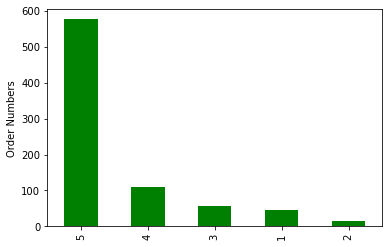

In [50]:
rating_count = feedback.Rating.value_counts()

rating_count.plot(kind = 'bar', color='green')
plt.ylabel('Order Numbers')

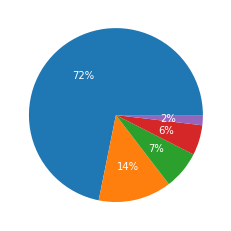

In [51]:
plt.pie(rating_count,labels = rating_count.index,textprops=dict(color="w") ,autopct='%1.0f%%');

### 1.4 Items Data Exploration

In [52]:
items_info.head()

,Id,Name,Description,PhotoUrl,TagsString,Rating,RatingCount,Calories,Fiber,Carbohydrate,SearchVector,IsGlobal,Property,Sku,Type
0,81465,Popina Bottled Water,NaN,https://res.cloudinary.com/fooreco/image/uploa...,NaN,NaN,0,NaN,NaN,NaN,'bottl':2 'popina':1 'water':3,False,NaN,NaN,Drink
1,81456,"Mayhem, Pinot Gris (bottle)",750 ML,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'alcohol':5 'bottl':4 'gris':3 'mayhem':1 'pin...,False,NaN,NaN,Liquor
2,81457,"Bartier Bros, Merlot (bottle)",NaN,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'alcohol':5 'bartier':1 'bottl':4 'bros':2 'me...,False,NaN,NaN,Liquor
3,81458,"Joie Brut, sparkling wine (1/2 Bottle)",NaN,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'1/2':5 'alcohol':7 'bottl':6 'brut':2 'joie':...,False,NaN,NaN,Liquor
4,81460,"Powell Street, Ode to Citra (473 Ml)",NaN,https://res.cloudinary.com/fooreco/image/uploa...,Alcohol,NaN,0,NaN,NaN,NaN,'473':6 'alcohol':8 'citra':5 'ml':7 'ode':3 '...,False,NaN,NaN,Liquor


In [53]:
items_info.columns

Index(['Id', 'Name', 'Description', 'PhotoUrl', 'TagsString', 'Rating',
       'RatingCount', 'Calories', 'Fiber', 'Carbohydrate', 'SearchVector',
       'IsGlobal', 'Property', 'Sku', 'Type'],
      dtype='object')

In [54]:
itemsInfo_df = items_info.drop(['PhotoUrl', 'TagsString', 'Rating',
       'RatingCount', 'Calories', 'Fiber', 'Carbohydrate',
       'IsGlobal', 'Property', 'Sku'] ,axis = 1)

In [55]:
itemsInfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83352 entries, 0 to 83351
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            83352 non-null  int64 
 1   Name          83352 non-null  object
 2   Description   62665 non-null  object
 3   SearchVector  83351 non-null  object
 4   Type          83352 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.2+ MB


In [56]:
# check the items that do not have description
filter = itemsInfo_df.Description.isnull()
itemsInfo_df[filter]

,Id,Name,Description,SearchVector,Type
0,81465,Popina Bottled Water,NaN,'bottl':2 'popina':1 'water':3,Drink
2,81457,"Bartier Bros, Merlot (bottle)",NaN,'alcohol':5 'bartier':1 'bottl':4 'bros':2 'me...,Liquor
3,81458,"Joie Brut, sparkling wine (1/2 Bottle)",NaN,'1/2':5 'alcohol':7 'bottl':6 'brut':2 'joie':...,Liquor
4,81460,"Powell Street, Ode to Citra (473 Ml)",NaN,'473':6 'alcohol':8 'citra':5 'ml':7 'ode':3 '...,Liquor
5,81462,Dark 'n' Stormy,NaN,'alcohol':4 'dark':1 'n':2 'stormi':3,Liquor
...,...,...,...,...,...
83341,82519,Wagyu Omakase,NaN,'omakas':2 'wagyu':1,Main
83342,82529,Summer Omakase,NaN,'omakas':2 'summer':1,Main
83349,82535,Crispy Fish Sandwich,NaN,'crispi':1 'fish':2 'sandwich':3,Main
83350,82536,Shoestring Fries (G),NaN,'fri':2 'g':3 'potato':4 'shoestr':1,Main


In [57]:
itemsInfo_df.Type[filter].value_counts()

Main      20591
Drink        51
Liquor       32
Side         13
Name: Type, dtype: int64

As seen above many of the items that do not have description are Main, and we will not drop them.

In [58]:
itemsInfo_df.Type.value_counts()

Main       83161
Liquor        93
Drink         62
Side          33
Popular        3
Name: Type, dtype: int64

Almost all the items can be categorized as Main, very few items with other types. Lets see which items appear the most in the menus.

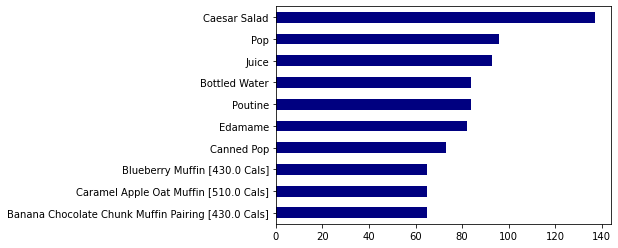

In [59]:
itemsInfo_df['Name'].value_counts()[0:10].plot(kind = 'barh', fontsize= 10, color='navy').invert_yaxis()

In [60]:
mask = (itemsInfo_df.Name != 'Pop') & (itemsInfo_df.Name != 'Juice') & (itemsInfo_df.Name != 'Bottled Water')
itemsInfo_masked = itemsInfo_df[mask]

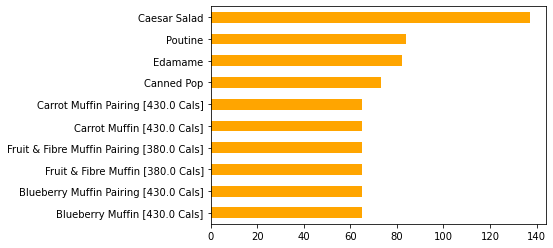

In [61]:
itemsInfo_masked['Name'].value_counts()[0:10].plot(kind = 'barh',fontsize= 10, color='orange').invert_yaxis()

## 2. Exploratory Data Analysis


Lets merge the feedback dataset with the order dataset.

In [62]:
user_order_feedback= pd.merge(users_order , feedback , left_on= 'OrderId' , right_on= 'OrderId' , how='left')

In [63]:
user_order_feedback.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6721 entries, 0 to 6720
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       6721 non-null   int64         
 1   UserId        6721 non-null   int64         
 2   RestaurantId  6721 non-null   int64         
 3   Date          6721 non-null   datetime64[ns]
 4   Details       6721 non-null   object        
 5   Address       350 non-null    object        
 6   Items         6721 non-null   object        
 7   Id            474 non-null    float64       
 8   Rating        474 non-null    float64       
 9   Comments      98 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 577.6+ KB


As seen before Items feature may have more than one item, below we will extract and split them in different rows for better analysis

In [64]:
data_list = library.utils.extract_items(user_order_feedback)

In [65]:
len(data_list)

15364

In [66]:
orders_user_feedback =  pd.DataFrame(data_list, columns =['OrderId','UserId','Item','RestaurantId','Date','Rating','Comments','Address'])

In [67]:
orders_user_feedback.head()

,OrderId,UserId,Item,RestaurantId,Date,Rating,Comments,Address
0,8,113,"{'Id': 211, 'Name': 'Tableside Spinach Salad',...",110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12..."
1,8,113,"{'Id': 218, 'Name': 'King Crab', 'Price': 27.0...",110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12..."
2,45,113,"{'Id': 193, 'Name': 'Baked Lobster Gnocchi', '...",110,2020-04-15 21:32:36.397056,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12..."
3,45,113,"{'Id': 189, 'Name': 'Roasted Chicken Supreme',...",110,2020-04-15 21:32:36.397056,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12..."
4,13,113,"{'Id': 193, 'Name': 'Baked Lobster Gnocchi', '...",110,2020-03-30 22:22:26.322592,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12..."


In [68]:
orders_user_feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       15364 non-null  int64         
 1   UserId        15364 non-null  int64         
 2   Item          15364 non-null  object        
 3   RestaurantId  15364 non-null  int64         
 4   Date          15364 non-null  datetime64[ns]
 5   Rating        1149 non-null   float64       
 6   Comments      261 non-null    object        
 7   Address       905 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 960.4+ KB


In [69]:
orders_user_feedback.OrderId.nunique()

6721

In [70]:
orders_user_feedback['ItemId'] = orders_user_feedback.Item.apply(lambda x : library.utils.return_value('id',x))
orders_user_feedback['ItemName'] = orders_user_feedback.Item.apply(lambda x : library.utils.return_value('name',x))

In [71]:
full_data =  pd.merge(orders_user_feedback,itemsInfo_df , left_on= 'ItemName', right_on= 'Name', how='left')

In [72]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44290 entries, 0 to 44289
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       44290 non-null  int64         
 1   UserId        44290 non-null  int64         
 2   Item          44290 non-null  object        
 3   RestaurantId  44290 non-null  int64         
 4   Date          44290 non-null  datetime64[ns]
 5   Rating        3371 non-null   float64       
 6   Comments      860 non-null    object        
 7   Address       4111 non-null   object        
 8   ItemId        44290 non-null  int64         
 9   ItemName      44290 non-null  object        
 10  Id            43554 non-null  float64       
 11  Name          43554 non-null  object        
 12  Description   27619 non-null  object        
 13  SearchVector  43554 non-null  object        
 14  Type          43554 non-null  object        
dtypes: datetime64[ns](1), float64(2), in

In [73]:
full_data.head()

,OrderId,UserId,Item,RestaurantId,Date,Rating,Comments,Address,ItemId,ItemName,Id,Name,Description,SearchVector,Type
0,8,113,"{'Id': 211, 'Name': 'Tableside Spinach Salad',...",110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",211,Tableside Spinach Salad,180.0,Tableside Spinach Salad,NaN,'almond':8 'babi':4 'bacon':11 'jack':10 'mont...,Main
1,8,113,"{'Id': 211, 'Name': 'Tableside Spinach Salad',...",110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",211,Tableside Spinach Salad,149.0,Tableside Spinach Salad,NaN,'almond':8 'babi':4 'bacon':11 'jack':10 'mont...,Main
2,8,113,"{'Id': 218, 'Name': 'King Crab', 'Price': 27.0...",110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",218,King Crab,158.0,King Crab,NaN,'blanc':9 'buerr':8 'caper':7 'char':3 'chilli...,Main
3,45,113,"{'Id': 193, 'Name': 'Baked Lobster Gnocchi', '...",110,2020-04-15 21:32:36.397056,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",193,Baked Lobster Gnocchi,388.0,Baked Lobster Gnocchi,NaN,'atlant':4 'bake':1 'cream':7 'gnocchi':3 'lob...,Main
4,45,113,"{'Id': 189, 'Name': 'Roasted Chicken Supreme',...",110,2020-04-15 21:32:36.397056,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",189,Roasted Chicken Supreme,385.0,Roasted Chicken Supreme,NaN,'chicken':2 'demi':11 'fingerl':7 'glace':12 '...,Main


In [74]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44290 entries, 0 to 44289
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       44290 non-null  int64         
 1   UserId        44290 non-null  int64         
 2   Item          44290 non-null  object        
 3   RestaurantId  44290 non-null  int64         
 4   Date          44290 non-null  datetime64[ns]
 5   Rating        3371 non-null   float64       
 6   Comments      860 non-null    object        
 7   Address       4111 non-null   object        
 8   ItemId        44290 non-null  int64         
 9   ItemName      44290 non-null  object        
 10  Id            43554 non-null  float64       
 11  Name          43554 non-null  object        
 12  Description   27619 non-null  object        
 13  SearchVector  43554 non-null  object        
 14  Type          43554 non-null  object        
dtypes: datetime64[ns](1), float64(2), in

In [75]:
full_data.drop(['Item','ItemId','ItemName','Id'], axis = 1 , inplace=True)

In [76]:
full_data.drop('Address', axis = 1).nunique()

OrderId         6721
UserId          4222
RestaurantId       7
Date            6721
Rating             5
Comments          98
Name             376
Description      586
SearchVector     528
Type               5
dtype: int64

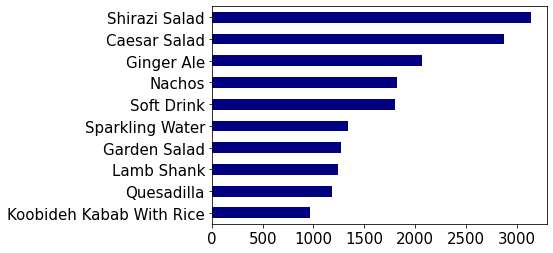

In [77]:
#top 10 orders in all orders
full_data['Name'].value_counts()[0:10].plot(kind = 'barh', fontsize=15, color='navy').invert_yaxis()


In [78]:
full_data['RestaurantId'].value_counts()

1029    12376
299     11861
121     11832
1034     7014
110      1168
1048       26
1040       13
Name: RestaurantId, dtype: int64

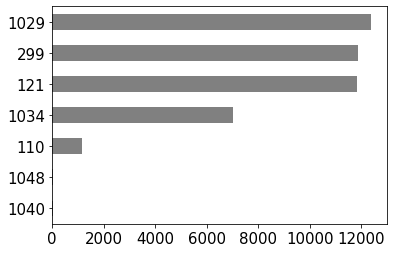

In [79]:
full_data['RestaurantId'].value_counts()[0:10].plot(kind = 'barh', fontsize=15, color='gray').invert_yaxis()